# Multimodal Coding with Qwen3-VL (Together AI)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/togethercomputer/together-cookbook/blob/main/Multimodal/Vision/Image_to_Code.ipynb)


## Introduction

In this notebook, we'll explore Qwen3-VL's image-to-code generation capabilities using Together AI's API. We'll cover:

1. **Screenshot to HTML**: Convert UI screenshots into functional HTML code
2. **Chart to Code**: Generate matplotlib code to recreate charts

These capabilities are useful for rapid prototyping and data visualization.


### Install required libraries


In [ ]:
!pip install openai pillow matplotlib


In [1]:
import os
import re
import base64
import openai
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Together AI Configuration
client = openai.OpenAI(
    api_key=os.environ.get("TOGETHER_API_KEY"),
    base_url="https://api.together.xyz/v1",
)

MODEL_ID = "Qwen/Qwen3-VL-32B-Instruct"

print(f"Using model: {MODEL_ID}")
print(f"API Key configured: {bool(os.environ.get('TOGETHER_API_KEY'))}")


Using model: Qwen/Qwen3-VL-32B-Instruct
API Key configured: True


In [2]:
# Utility functions

def encode_image(image_path):
    with open(image_path, "rb") as f:
        return base64.b64encode(f.read()).decode("utf-8")

def get_mime_type(image_path):
    ext = image_path.split(".")[-1].lower()
    return "jpeg" if ext in ["jpg", "jpeg"] else ext

def extract_code_block(text, language="python"):
    """Extract the last code block from the text."""
    pattern = rf"```(?:{language}|html)(.*?)```"
    code_blocks = re.findall(pattern, text, re.DOTALL)
    if code_blocks:
        return code_blocks[-1].strip()
    return None

def show_image(image_path, max_width=800):
    """Display image in notebook."""
    img = Image.open(image_path)
    if img.width > max_width:
        ratio = max_width / img.width
        new_height = int(img.height * ratio)
        img = img.resize((max_width, new_height))
    display(img)


## 1. Image-to-HTML Conversion

Convert a screenshot or sketch into functional HTML code.


In [3]:
def screenshot_to_html(image_path):
    """Convert screenshot to HTML using Qwen3-VL."""
    base64_image = encode_image(image_path)
    mime_type = get_mime_type(image_path)
    
    response = client.chat.completions.create(
        model=MODEL_ID,
        messages=[{
            "role": "user",
            "content": [
                {"type": "image_url", "image_url": {"url": f"data:image/{mime_type};base64,{base64_image}"}},
                {"type": "text", "text": "Analyze this screenshot and convert it to clean, functional and modern HTML code."},
            ],
        }],
        max_tokens=16384,
        temperature=0.8,
    )
    
    response_text = response.choices[0].message.content
    code = extract_code_block(response_text, "html")
    return code if code else response_text


Input image:


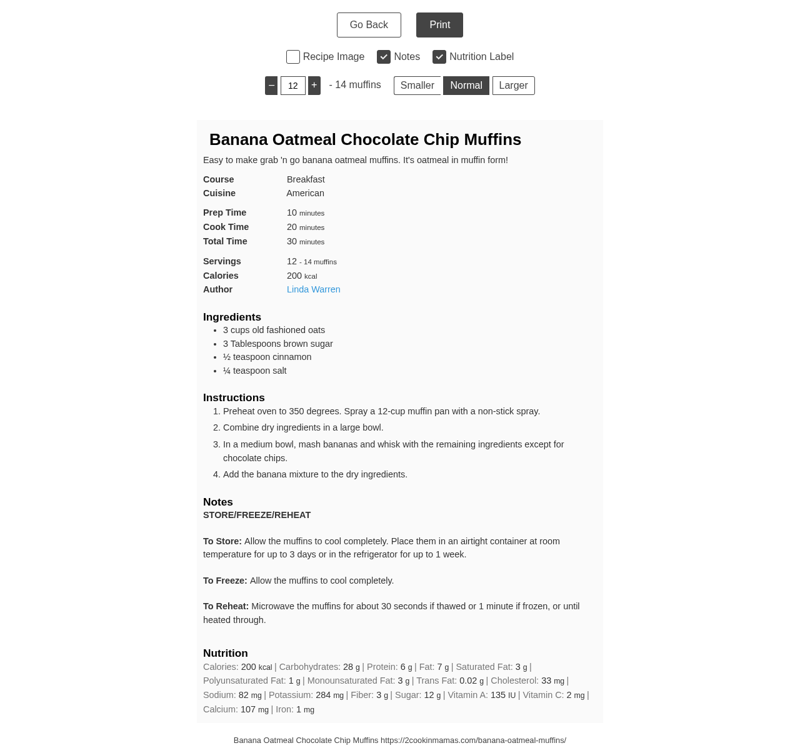


Generated HTML (first 2000 chars):
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Banana Oatmeal Chocolate Chip Muffins</title>
  <style>
    body {
      font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
      line-height: 1.6;
      color: #333;
      max-width: 800px;
      margin: 0 auto;
      padding: 20px;
      background-color: #f9f9f9;
    }

    .recipe-header {
      text-align: center;
      margin-bottom: 20px;
    }

    .controls {
      display: flex;
      justify-content: center;
      gap: 15px;
      margin-bottom: 20px;
      flex-wrap: wrap;
    }

    .btn {
      padding: 8px 16px;
      border: 1px solid #ccc;
      border-radius: 4px;
      background-color: #fff;
      cursor: pointer;
      font-size: 14px;
    }

    .btn:hover {
      background-color: #f0f0f0;
    }

    .btn-primary {
      background-color: #444;
      color: white;
      bo

In [4]:
# Example: Convert a screenshot to HTML
input_image_path = "../assets/multimodal_coding/screenshot_demo.png"

print("Input image:")
show_image(input_image_path)

html_code = screenshot_to_html(input_image_path)
print("\n" + "="*50)
print("Generated HTML (first 2000 chars):")
print("="*50)
print(html_code[:2000] if html_code else "No code generated")


HTML saved to generated_output.html


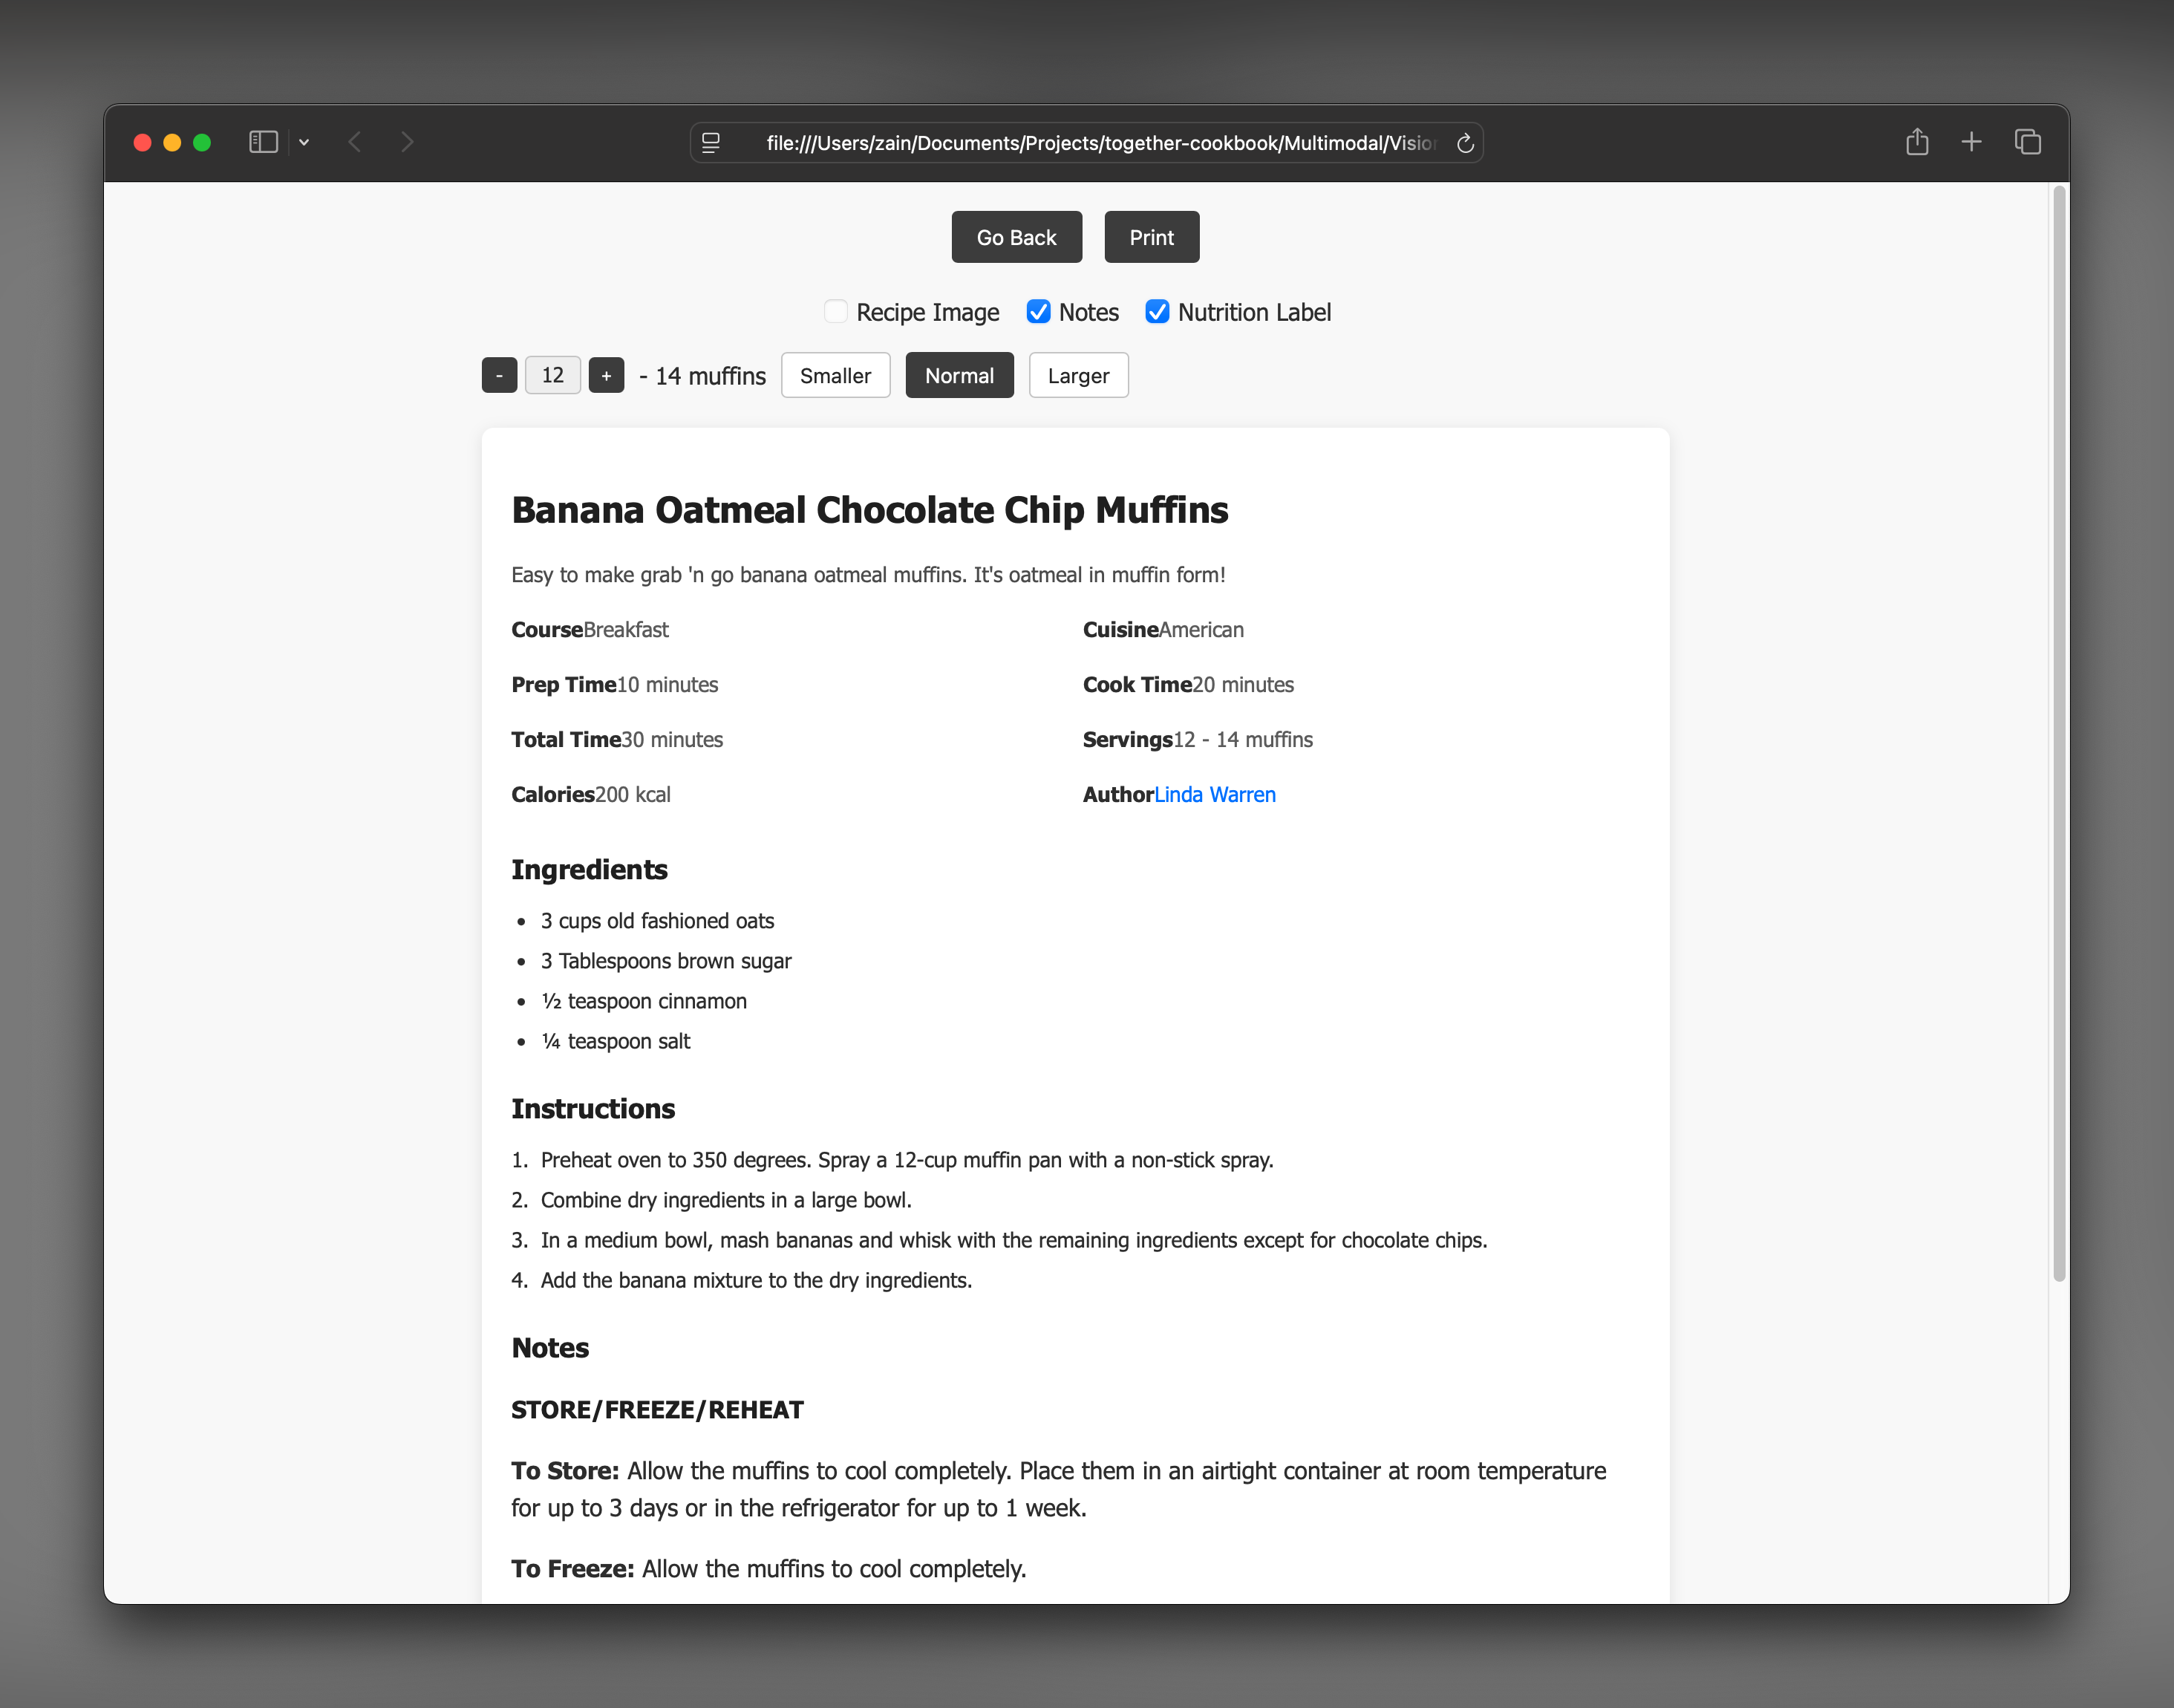

In [6]:
# Save and optionally view the HTML
if html_code:
    output_html_path = "generated_output.html"
    with open(output_html_path, "w") as f:
        f.write(html_code)
    print(f"HTML saved to {output_html_path}")
    
from IPython.display import display
from PIL import Image

display(Image.open("../assets/screen_to_code.png"))


## 2. Chart-to-Code

Analyze a chart image and generate matplotlib code to recreate it.


In [7]:
def chart_to_matplotlib(image_path):
    """Convert chart image to matplotlib code using Qwen3-VL."""
    base64_image = encode_image(image_path)
    mime_type = get_mime_type(image_path)
    
    response = client.chat.completions.create(
        model=MODEL_ID,
        messages=[{
            "role": "user",
            "content": [
                {"type": "text", "text": "Convert this chart image to Python matplotlib code that can reproduce the chart."},
                {"type": "image_url", "image_url": {"url": f"data:image/{mime_type};base64,{base64_image}"}},
            ],
        }],
        max_tokens=16384,
        temperature=0.8,
    )
    
    response_text = response.choices[0].message.content
    code = extract_code_block(response_text, "python")
    return code if code else response_text


Input chart:


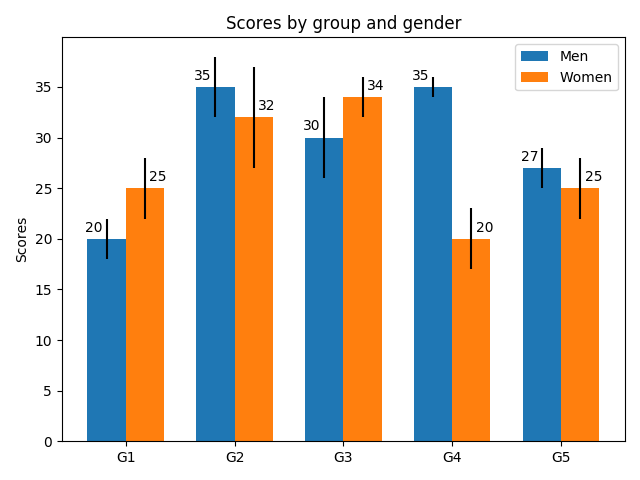


Generated Matplotlib Code:
import matplotlib.pyplot as plt

# Data
groups = ['G1', 'G2', 'G3', 'G4', 'G5']
men_scores = [20, 35, 30, 35, 27]
women_scores = [25, 32, 34, 20, 25]
men_errors = [1, 1, 1, 1, 1]  # Error bars (approximated from image)
women_errors = [1, 1, 1, 1, 1]  # Error bars (approximated from image)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width
bar_width = 0.35

# Calculate positions for bars
index = range(len(groups))

# Plot bars for Men
men_bars = ax.bar(index, men_scores, bar_width, label='Men', color='steelblue', edgecolor='black', linewidth=0.5)

# Plot bars for Women
women_bars = ax.bar([i + bar_width for i in index], women_scores, bar_width, label='Women', color='darkorange', edgecolor='black', linewidth=0.5)

# Add error bars
ax.errorbar(index, men_scores, yerr=men_errors, fmt='none', ecolor='black', capsize=5, capthick=1)
ax.errorbar([i + bar_width for i in index], women_scores, yerr=women_errors, fmt='none', ecolor

In [13]:
# Example: Convert a chart to matplotlib code
chart_path = "../assets/sphx_glr_barchart_001.webp"

print("Input chart:")
show_image(chart_path)

matplotlib_code = chart_to_matplotlib(chart_path)
print("\n" + "="*50)
print("Generated Matplotlib Code:")
print("="*50)
print(matplotlib_code if matplotlib_code else "No code generated")


## 3. Execute Generated Code (Optional)

⚠️ **Warning**: Only execute code you have reviewed and trust.


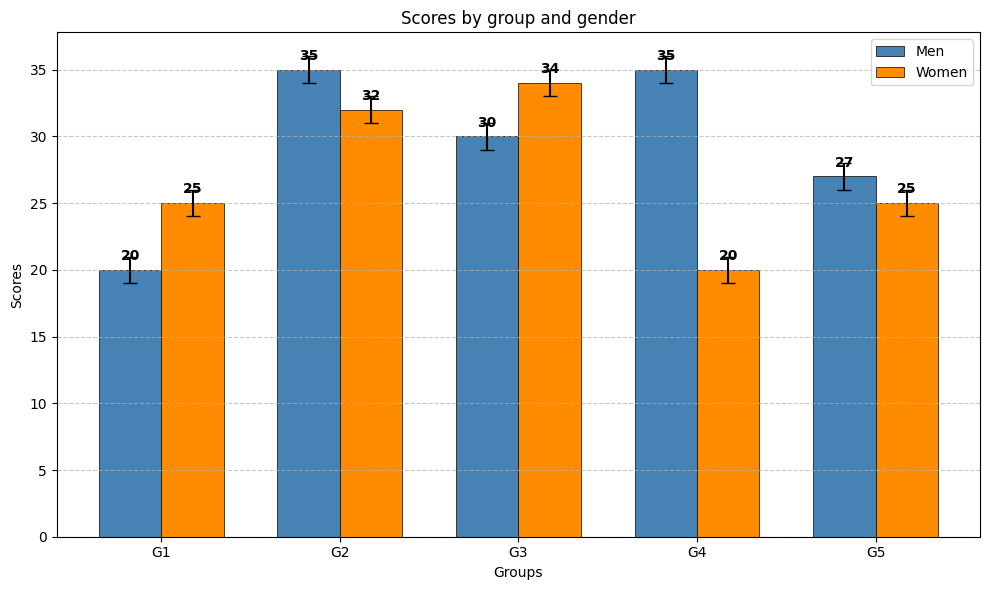

In [ ]:
# Uncomment to execute the generated matplotlib code
# ONLY DO THIS IF YOU HAVE REVIEWED THE CODE

# ALLOW_EXECUTION = True
# if ALLOW_EXECUTION and matplotlib_code:
#     try:
#         exec(matplotlib_code)
#         plt.show()
#     except Exception as e:
#         print(f"Error executing code: {e}")


In [ ]:
# https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEj-ZStrYVLlanGuxuDmk_m2W8oXCIH-ueK9cgORQC_oY9_YwAkxf4npj2GbupXFaroy0s05fc2naWUsoF8J6R-A1pzKvsIKNn_ZmfYQqHKsVfmc0gVM2jcH6ZCb4ykO0H847mWyCYctwy0C/s1600/basics_matplotlib.PNG